# IMPORTS

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

## Data

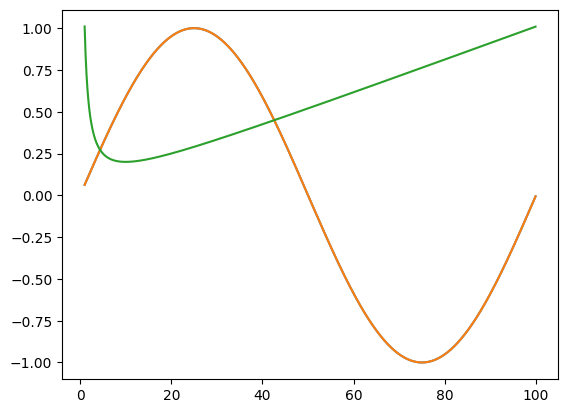

In [6]:
t=np.arange(1,100,0.1)
x=1/t+0.01*t
s1=np.sin(2*np.pi*0.01*t)
s2=np.sin(2*np.pi*0.01*t)
plt.plot(t,s1)
plt.plot(t,s2)
plt.plot(t,x)

In [7]:
d = {'t': t, 'x':x, 's1': s1, 's2': s2}
df = pd.DataFrame(data=d)
print(len(df))
df.head()

990


,t,x,s1,s2
0,1.0,1.010000,0.062791,0.062791
1,1.1,0.920091,0.069060,0.069060
2,1.2,0.845333,0.075327,0.075327
3,1.3,0.782231,0.081591,0.081591
4,1.4,0.728286,0.087851,0.087851


# CORRELATION PLOT

In [8]:
from hvac_control.preprocessing import *
from hvac_control.data import load_data, save_img, save_data

columns=['x','s1']
max_shift = 900

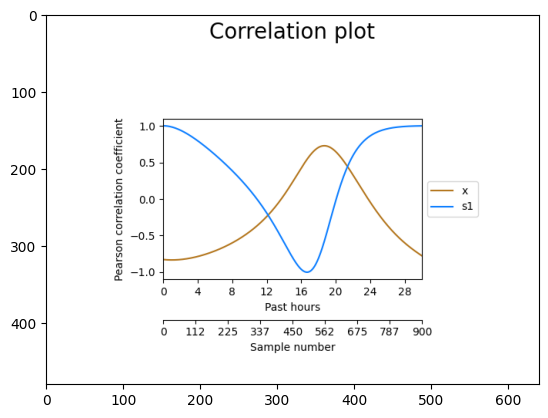

In [9]:
list_of_dict = []

for shift in range(max_shift):
    df_copy=df.copy()
    df_copy[columns] = df_copy[columns].shift(shift)
    df_remove = df_copy.iloc[shift:]
    correaltions = df_remove.corr(method='pearson').iloc[:,-1] # we assume the reference signal is the rightmost column
    d_correlations = correaltions.to_dict()
    list_of_dict.append(d_correlations)

df_corr = pd.DataFrame(list_of_dict, columns=list(list_of_dict[0].keys()))    
df_to_plot = df_corr[columns].copy()

plt2 = correlation_plot(df_to_plot, columns, main_title='Correlation plot')
plt.imshow(plt2)

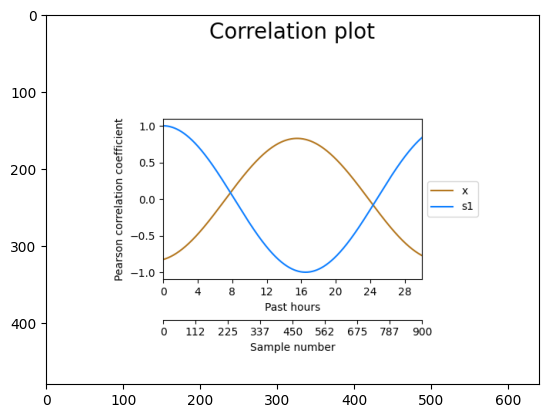

In [35]:
list_of_dict = []

for shift in range(max_shift):
    df_copy=df.copy()
    df_shifted=pd.concat([df_copy[columns].iloc[-shift:], df_copy[columns].iloc[:-shift]])
    df_copy[columns]=df_shifted.to_numpy()
    correaltions = df_copy.corr(method='pearson').iloc[:,-1] # we assume the reference signal is the rightmost column
    d_correlations = correaltions.to_dict()
    list_of_dict.append(d_correlations)

df_corr = pd.DataFrame(list_of_dict, columns=list(list_of_dict[0].keys()))    
df_to_plot = df_corr[columns].copy()

plt2 = correlation_plot(df_to_plot, columns, main_title='Correlation plot')
plt.imshow(plt2)

## Application to data of interest

In [37]:
x_columns = ['T_ext', 'Solar_irrad', 'T_imp', 
           'BC1_power', 'BC2_power', 'Refr1_power', 
           'Refr2_power', 'BC1_flow', 'BC2_flow', 
           'Refr1_flow', 'Refr2_flow']

y_column = ['T_ret']

all_columns = x_columns + y_column

max_minutes=30
rows_to_skip=2
max_consecutive_nans=30
thresh_len=1000
choosen_df=1

df = load_data("gaia_data.csv", header_names=None)
dfs = first_preprocessing_step(df, max_minutes, rows_to_skip, max_consecutive_nans, thresh_len, all_columns)
df_index = dfs[choosen_df]
df_index = remove_specific_day(df_index, '2022-05-25')
dfs_day_working_hours = remove_non_working_hours(df_index, strating_hour='04:55', ending_hour='18:30')

In [38]:
df_day = dfs_day_working_hours[1]
print(len(df_day))
df_day.head()

408


,T_ext,Solar_irrad,T_imp,BC1_power,BC2_power,Refr1_power,Refr2_power,BC1_flow,BC2_flow,Refr1_flow,Refr2_flow,T_ret
datetime,,,,,,,,,,,,
2022-05-19 04:56:00+00:00,17.40,30.0,9.380005,3.15,15.70,14.45,0.25,2865.0,2563.0,0.0,3009.0,10.170013
2022-05-19 04:58:00+00:00,17.51,32.0,9.230011,3.15,15.75,14.55,0.25,2822.0,2548.0,0.0,3153.0,10.200012
2022-05-19 05:00:00+00:00,17.51,33.0,9.290009,3.15,15.65,14.50,0.25,2764.0,2448.0,0.0,3456.0,10.110016
2022-05-19 05:02:00+00:00,17.51,35.0,9.380005,3.20,15.55,14.40,0.25,2894.0,2577.0,0.0,3312.0,10.200012
2022-05-19 05:04:00+00:00,17.51,37.0,9.350006,3.20,15.60,14.40,0.25,2779.0,2635.0,0.0,3254.0,10.200012


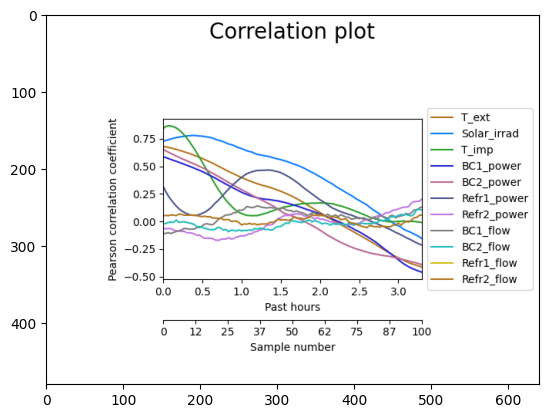

In [39]:
list_of_dict = []
columns=x_columns.copy()
max_shift = 100

for shift in range(max_shift):
    df_copy=df_day.copy()
    df_copy[columns] = df_copy[columns].shift(shift)
    df_remove = df_copy.iloc[shift:]
    correaltions = df_remove.corr(method='pearson').iloc[:,-1] # we assume the reference signal is the rightmost column
    d_correlations = correaltions.to_dict()
    list_of_dict.append(d_correlations)

df_corr = pd.DataFrame(list_of_dict, columns=list(list_of_dict[0].keys()))    
df_to_plot = df_corr[columns].copy()

plt2 = correlation_plot(df_to_plot, columns, main_title='Correlation plot')
plt.imshow(plt2)

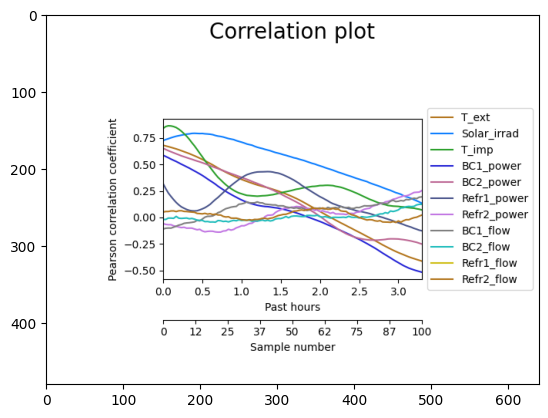

In [40]:
list_of_dict = []
columns=x_columns.copy()
max_shift = 100

for shift in range(max_shift):
    df_copy=df_day.copy()
    df_shifted=pd.concat([df_copy[columns].iloc[-shift:], df_copy[columns].iloc[:-shift]])
    df_copy[columns]=df_shifted.to_numpy()
    correaltions = df_copy.corr(method='pearson').iloc[:,-1] # we assume the reference signal is the rightmost column
    d_correlations = correaltions.to_dict()
    list_of_dict.append(d_correlations)

df_corr = pd.DataFrame(list_of_dict, columns=list(list_of_dict[0].keys()))    
df_to_plot = df_corr[columns].copy()

plt2 = correlation_plot(df_to_plot, columns, main_title='Correlation plot')
plt.imshow(plt2)